In [50]:
from google.colab import drive
from ultralytics import YOLO
import matplotlib.pyplot as plt
import rasterio
import os

In [56]:
drive.mount('/content/drive')

# Define the path to your dataset and model configuration
data_path = "/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images"
config_file = "yolov8n.yaml"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Display some images

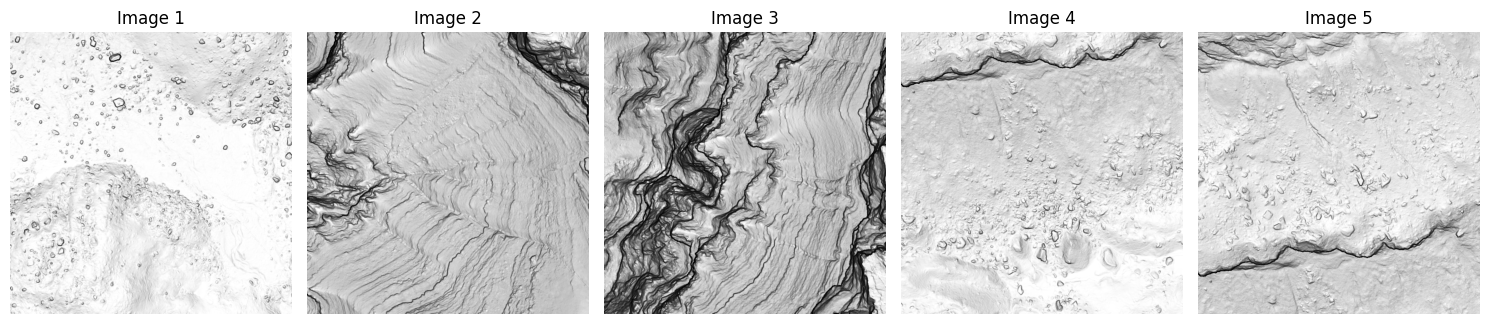

In [57]:
def display_images(data_path):
    # List all .tif files in the directory
    tif_files = [f for f in os.listdir(data_path) if f.endswith('.tif')]

    # Ensure there are at least 5 images
    num_images = min(5, len(tif_files))
    if num_images == 0:
        print("No .tif files found in the directory.")
        return

    # Plot the first 5 images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        file_path = os.path.join(data_path, tif_files[i])
        with rasterio.open(file_path) as src:
            image = src.read(1)  # Read the first band
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Image {i+1}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Display the images
display_images(data_path)

In [68]:
import os
from PIL import Image

def convert_labels_to_yolo_format(image_folder, label_folder):
    for image_filename in os.listdir(image_folder):
        if image_filename.endswith('.tif'):
            image_path = os.path.join(image_folder, image_filename)
            label_filename = image_filename.replace('.tif', '.txt')
            label_path = os.path.join(label_folder, label_filename)

            # Open image to get dimensions
            image = Image.open(image_path)
            img_width, img_height = image.size

            # Read the label file (assuming the label data is in JSON-like format)
            with open(label_path, 'r') as label_file:
                labels = label_file.readlines()

            # Prepare the YOLO labels
            yolo_labels = []
            for label in labels:
                label_data = eval(label)  # Convert string to dictionary

                # Extract the pixel coordinates and normalize them
                x_pixel, y_pixel = label_data['pixel_within_patch_coordinates']
                x_center = x_pixel / img_width
                y_center = y_pixel / img_height

                # For simplicity, assuming fixed width and height for bounding box (e.g., 50x50 pixels)
                width = 50 / img_width
                height = 50 / img_height

                # Convert to YOLO format (class_id = 0 for 'rock')
                yolo_label = f"0 {x_center} {y_center} {width} {height}"
                yolo_labels.append(yolo_label)

            # Save the labels in YOLO format, overwriting the existing label file
            with open(label_path, 'w') as output_label_file:
                output_label_file.write('\n'.join(yolo_labels))

# Example usage

# Example usage
convert_labels_to_yolo_format(
    image_folder='/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images',
    label_folder='/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/labels'
)


SyntaxError: invalid syntax (<string>, line 1)

In [79]:
import glob
import os
from PIL import Image

input_dir = '/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/'

# Convert all .tif files to .jpg and remove the original .tif files
for tif_file in glob.glob(input_dir + '*.tif'):
    with Image.open(tif_file) as img:
        jpg_file = tif_file.replace('.tif', '.jpg')
        img.convert('RGB').save(jpg_file, 'JPEG')
    # Remove the .tif file after conversion
    os.remove(tif_file)

print("Conversion completed and .tif files removed.")

Conversion completed and .tif files removed.


In [81]:

# Load the model
model = YOLO("yolov8n.yaml")

# Validate the dataset
results = model.val(data="/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/dataset.yaml")

WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 31,920 gradients, 8.7 GFLOPs


val: Scanning /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/labels... 64 images, 37 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<00:00, 68.18it/s]


val: New cache created: /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:22<00:00,  5.67s/it]

                   all         64        292          0          0          0          0


Speed: 6.1ms preprocess, 326.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val5


In [82]:
model = YOLO(config_file)  # Load a YOLOv8 model

# Train the model
model.train(
    data="/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/dataset.yaml",          # Path to the dataset
    epochs=50,               # Number of training epochs
    imgsz=640,               # Image size for training
    batch=16,                # Batch size
    name="yolov8_hillshade", # Name of the training run
    project="yolov8_train",  # Directory to save training results
    workers=4                # Number of data loader workers
)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=yolov8_train, name=yolov8_hillshade6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

train: Scanning /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/labels... 576 images, 283 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:10<00:00, 56.59it/s]

train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2582_1127_0_1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2588_1133_0_2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2588_1133_1_2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2598_1132_0_3.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2598_1132_1_3.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_h

train: New cache created: /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/labels.cache... 64 images, 37 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<?, ?it/s]

Plotting labels to yolov8_train/yolov8_hillshade6/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to yolov8_train/yolov8_hillshade6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      5.255      4.849      3.951        100        640: 100%|██████████| 36/36 [08:12<00:00, 13.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.73s/it]

                   all         64        292          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G       3.63      4.024      3.085         65        640: 100%|██████████| 36/36 [07:57<00:00, 13.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.30s/it]

                   all         64        292          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      3.095      3.403      2.466         90        640: 100%|██████████| 36/36 [07:55<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.95s/it]

                   all         64        292   0.000104    0.00685   7.02e-05   3.72e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      2.775      3.271      2.318        138        640: 100%|██████████| 36/36 [07:58<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:23<00:00, 11.78s/it]

                   all         64        292      0.151      0.154     0.0782     0.0307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      2.575      3.127      2.135         81        640: 100%|██████████| 36/36 [08:02<00:00, 13.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.21s/it]

                   all         64        292      0.171      0.175     0.0799     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      2.583      3.131      2.051        149        640: 100%|██████████| 36/36 [07:57<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:25<00:00, 12.72s/it]

                   all         64        292    0.00149     0.0582   0.000791   0.000211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      2.497      2.952       1.98         93        640: 100%|██████████| 36/36 [08:01<00:00, 13.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.44s/it]

                   all         64        292      0.282      0.178      0.147     0.0674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      2.357      2.866      1.897        149        640: 100%|██████████| 36/36 [07:52<00:00, 13.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.23s/it]

                   all         64        292      0.242      0.216      0.153      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      2.188      2.772      1.822         79        640:  72%|███████▏  | 26/36 [05:52<02:15, 13.57s/it]


KeyboardInterrupt: 